In [32]:

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from lib.data_normalizer import draw_image_with_boxes

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

IMAGE_SHAPE = (256,256)


## Modelo de identificación de placas

In [27]:
model = models.Sequential([

#   Convolution layers
    layers.Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu', padding="same"),

#   Normal layers
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.2), # Evita la conexión total entre capaz para evitar overfitting
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(5,activation='sigmoid'),   # 5 neuronas de salida, desempeño + fronteras
])
#model.summary()

model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

# Comentarios

# 1. muestreo %validación %entrenamiento
# 2. Cargar imágenes
# 3. Modelo
# 4. Entrenamiento
# 5. Validación
# 6. gráficas entrenamiento validación
# 7. Función de aplicación 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 flatten_2 (Flatten)         (None, 65536)            

## Carga de Datos

In [29]:

# Load csv
plates_data = pd.read_csv("./normalized_data/unique_plates.csv")

# Take a sample of the data
number_of_samples = 3000;
plates_data_sample = plates_data.sample(number_of_samples)

# Create arrays with inputs and outputs
plates_data_in = np.ndarray(shape=(number_of_samples, IMAGE_SHAPE[0], IMAGE_SHAPE[1], 3), dtype=np.uint8)
plates_data_out = np.array([plates_data_sample['tag'],
                            plates_data_sample['xmin'],
                            plates_data_sample['ymin'],
                            plates_data_sample['xmax'],
                            plates_data_sample['ymax']]).T


# Load images from paths in csv

for i, path in enumerate(plates_data_sample['img_path']):
    raw_image = cv2.imread(path, cv2.IMREAD_COLOR)
    plates_data_in[i,:,:,:] = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)  # Reorganize channels to RGB instead of BGR

# Normalize inputs
for i in range(len(plates_data_out)):
    plates_data_out[i][0] = plates_data_out[i][0] / 100             # tag
    plates_data_out[i][1] = plates_data_out[i][1] / IMAGE_SHAPE[0]  # xmin
    plates_data_out[i][2] = plates_data_out[i][2] / IMAGE_SHAPE[1]  # ymin
    plates_data_out[i][3] = plates_data_out[i][3] / IMAGE_SHAPE[0]  # xmax
    plates_data_out[i][4] = plates_data_out[i][4] / IMAGE_SHAPE[1]  # ymax


# print first column of plates_data_sample
#plt.imshow(plates_data_in[i])
#plt.show()

## Entrenamiento

In [30]:
history = model.fit(plates_data_in, plates_data_out,
                    validation_split=0.2,
                    epochs=10,
                    batch_size = 50).history

# model.save('models/model.h5')

2022-11-02 19:15:58.710480: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 471859200 exceeds 10% of free system memory.


Epoch 1/10


2022-11-02 19:15:59.972115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - ETA: 0s - loss: 408758848.0000 - accuracy: 0.6042

2022-11-02 19:16:50.418830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - 53s 956ms/step - loss: 408758848.0000 - accuracy: 0.6042 - val_loss: 2655166720.0000 - val_accuracy: 1.0000
Epoch 2/10
48/48 [==============================] - 50s 1s/step - loss: 344278892544.0000 - accuracy: 0.5713 - val_loss: 1324136660992.0000 - val_accuracy: 1.0000
Epoch 3/10
48/48 [==============================] - 50s 1s/step - loss: 20509322379264.0000 - accuracy: 0.6113 - val_loss: 50763166384128.0000 - val_accuracy: 1.0000
Epoch 4/10
48/48 [==============================] - 50s 1s/step - loss: 333154707570688.0000 - accuracy: 0.5938 - val_loss: 566499609673728.0000 - val_accuracy: 1.0000
Epoch 5/10
48/48 [==============================] - 50s 1s/step - loss: 2513726783619072.0000 - accuracy: 0.5521 - val_loss: 3505987172433920.0000 - val_accuracy: 1.0000
Epoch 6/10
48/48 [==============================] - 50s 1s/step - loss: 12286870641704960.0000 - accuracy: 0.5400 - val_loss: 13788272023044096.0000 - val_accuracy: 1.0000
Epoch 7/10
4

## Guardar modelo

In [31]:
model.save("./models/model.h5")

## Usar modelo

(1, 256, 256, 3)
1/1 [==============================] - 0s 52ms/step
[[  1. 256. 256. 256. 256.]]


2022-11-02 19:31:02.430336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


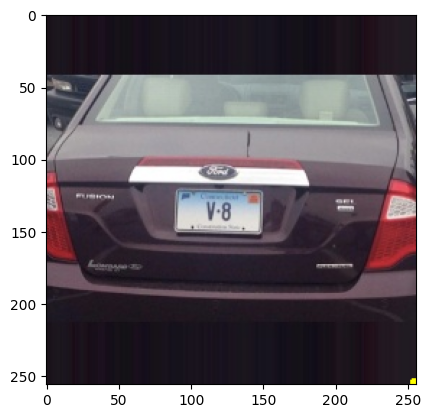

In [40]:
model = models.load_model("./models/model.h5")

test_image = np.ndarray(shape=(1, 256, 256, 3), dtype=np.uint8)
test_image[0] = cv2.imread("./normalized_data/plates_images/13.jpg", cv2.IMREAD_COLOR)
print(test_image.shape)
predicted_data = model.predict(test_image)

# Scale predicted data
predicted_data[0][1] = predicted_data[0][1] * IMAGE_SHAPE[0]  # xmin
predicted_data[0][2] = predicted_data[0][2] * IMAGE_SHAPE[1]  # ymin
predicted_data[0][3] = predicted_data[0][3] * IMAGE_SHAPE[0]  # xmax
predicted_data[0][4] = predicted_data[0][4] * IMAGE_SHAPE[1]  # ymax

# predicted_data[0][1] = 10  # xmin
# predicted_data[0][2] = 10  # ymin
# predicted_data[0][3] = 100  # xmax
# predicted_data[0][4] = 100  # ymax

print(predicted_data)
draw_image_with_boxes(test_image[0], predicted_data)

In [15]:
print(model.input_shape)

(None, 256, 256, 3)
